# Foodhub Orders

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np

### Understanding the structure of the data

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    return df

df = wrangle('foodhub-order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [3]:
df.shape

(1898, 9)

#### There are 1898 rows and 9 columns in the data

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [4]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### The order_id, customer_id, food_preparation_time, delivery_time columns have the integer datatypes. cost_of_the_order column is a float datatype (decimal). restaurant_name, cuisine_type, daya_of_the_week, and rating are all strings

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### All columns have the 1898 rows filled so there are no missing values. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [6]:
# find summary statistics of dataset

df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1477495.500000,171168.478398,16.498851,27.371970,24.161749
std,548.049724,113698.139743,7.483812,4.632481,4.972637
min,1476547.000000,1311.000000,4.470000,20.000000,15.000000
25%,1477021.250000,77787.750000,12.080000,23.000000,20.000000
50%,1477495.500000,128600.000000,14.140000,27.000000,25.000000
75%,1477969.750000,270525.000000,22.297500,31.000000,28.000000
max,1478444.000000,405334.000000,35.410000,35.000000,33.000000


#### The minimum, average and maximum time it takes to prepare a meal is 20minutes, 27 minutes, and 35 minutes respectively. 

### **Question 5:** How many orders are not rated? 

In [7]:
# Get count of the distinct values in the rating columns
rating_counts = df['rating'].value_counts()

print(rating_counts)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


#### 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

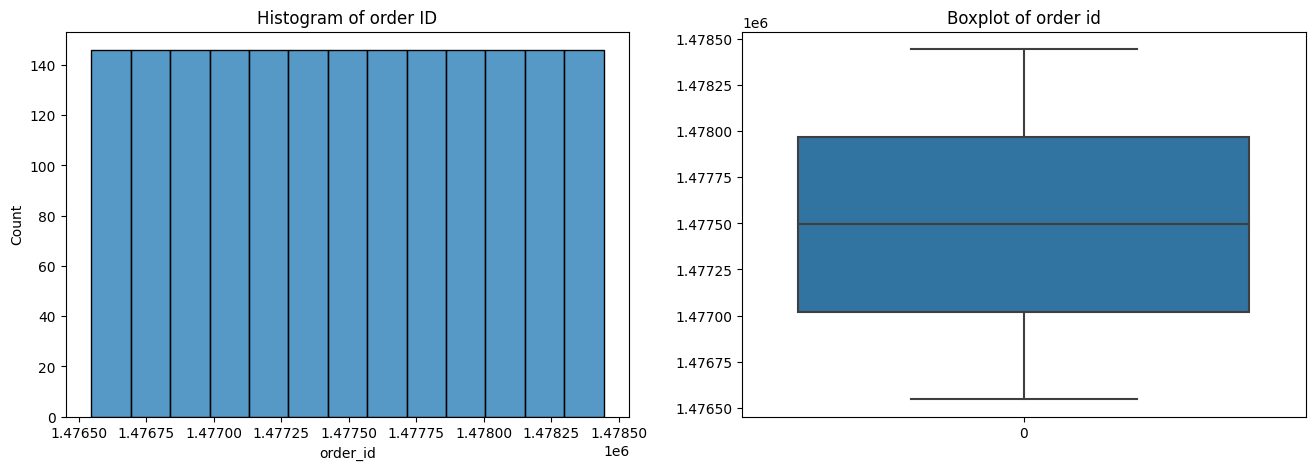

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['order_id'])
plt.title('Histogram of order ID')
plt.subplot(1,2,2)
sns.boxplot(df['order_id'])
plt.title('Boxplot of order id')
plt.show()

#### All values in the order_id column are unique. This shows that the order_id is the unique identification number of each order. There are no outliers in the column

#### Customer ID

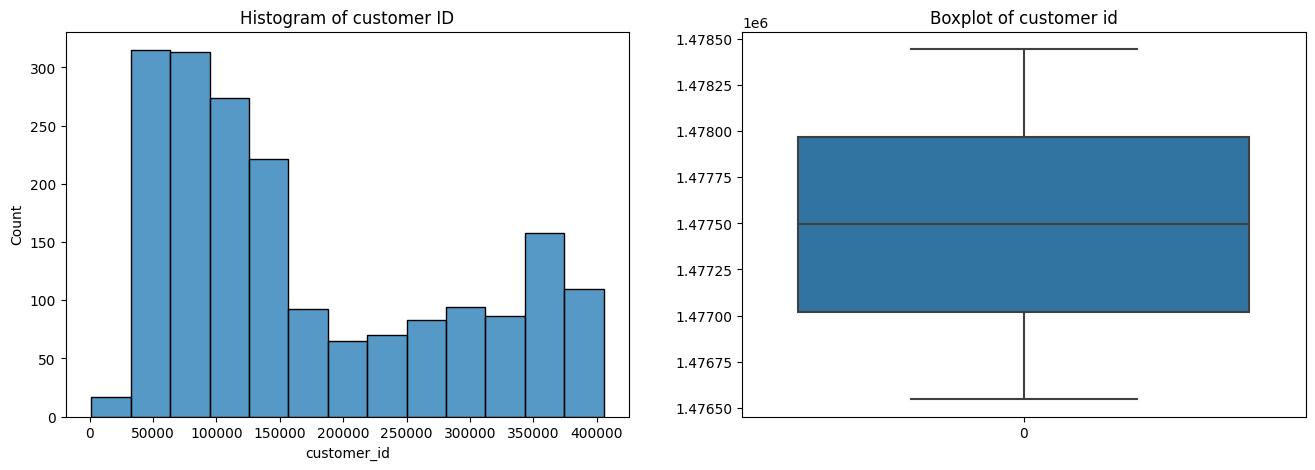

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['customer_id'])
plt.title('Histogram of customer ID')
plt.subplot(1,2,2)
sns.boxplot(df['order_id'])
plt.title('Boxplot of customer id')
plt.show()

#### customers with id between 50,000 and 150,000 make more orders than other customers. There are no outliers in this column mostlikely because the customer_id is the unique identification number of each customer

#### Restaurant name

In [10]:
restaurant_counts = Counter(df['restaurant_name'])

sorted_counts = sorted(restaurant_counts.items(), key=lambda x: x[1], reverse=True)

for category, count in sorted_counts:
    print(f"{category}: {count:,}")

Shake Shack: 219
The Meatball Shop: 132
Blue Ribbon Sushi: 119
Blue Ribbon Fried Chicken: 96
Parm: 68
RedFarm Broadway: 59
RedFarm Hudson: 55
TAO: 49
Han Dynasty: 46
Blue Ribbon Sushi Bar & Grill: 44
Nobu Next Door: 42
Sushi of Gari 46: 37
Rubirosa: 37
Momoya: 30
Blue Ribbon Sushi Izakaya: 29
Five Guys Burgers and Fries: 29
Tamarind TriBeCa: 27
Bareburger: 27
Jack's Wife Freda: 25
Sushi of Gari Tribeca: 24
Chipotle Mexican Grill $1.99 Delivery: 23
Cafe Mogador: 18
Yama Japanese Restaurant: 18
ilili Restaurant: 18
The Smile: 18
Cafe Habana: 16
Sushi of Gari: 16
The Kati Roll Company: 16
Westville Hudson: 15
P.J. Clarke's: 15
J. G. Melon: 15
Hill Country Fried Chicken: 14
Osteria Morini: 14
Empanada Mama (closed): 13
Vanessa's Dumplings: 13
Otto Enoteca Pizzeria: 12
S'MAC: 12
Burger Joint: 12
Sushi Samba: 11
Melt Shop: 11
Balthazar Boulangerie: 10
Cafeteria: 9
Xi'an Famous Foods: 9
Boqueria: 9
Vanessa's Dumpling House: 9
Dos Caminos: 8
Sarabeth's East: 7
Mamoun's Falafel: 7
Pepe Rosso To

#### The Shake Shack restaurant has more orders than all other restaurants while a number of restaurants have the least orders.

#### Cuisine type

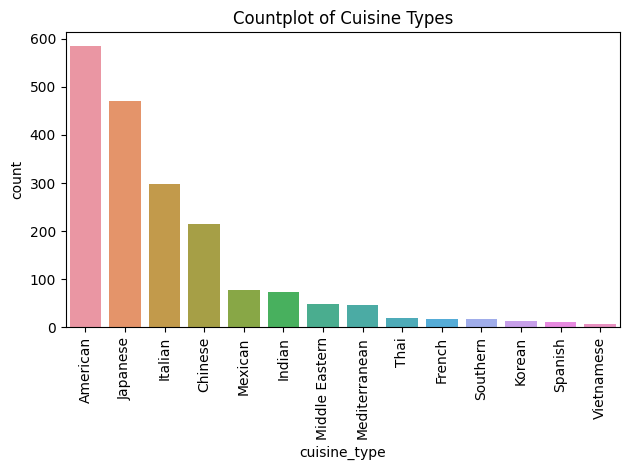

In [11]:
sorted_cuisine_type = df['cuisine_type'].value_counts().sort_values(ascending=False).index

sns.countplot(data=df, x='cuisine_type', order=sorted_cuisine_type)

plt.title('Countplot of Cuisine Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### American foods have more orders while the Vietnamese foods have less orders compared to other foods.

#### Cost of the order

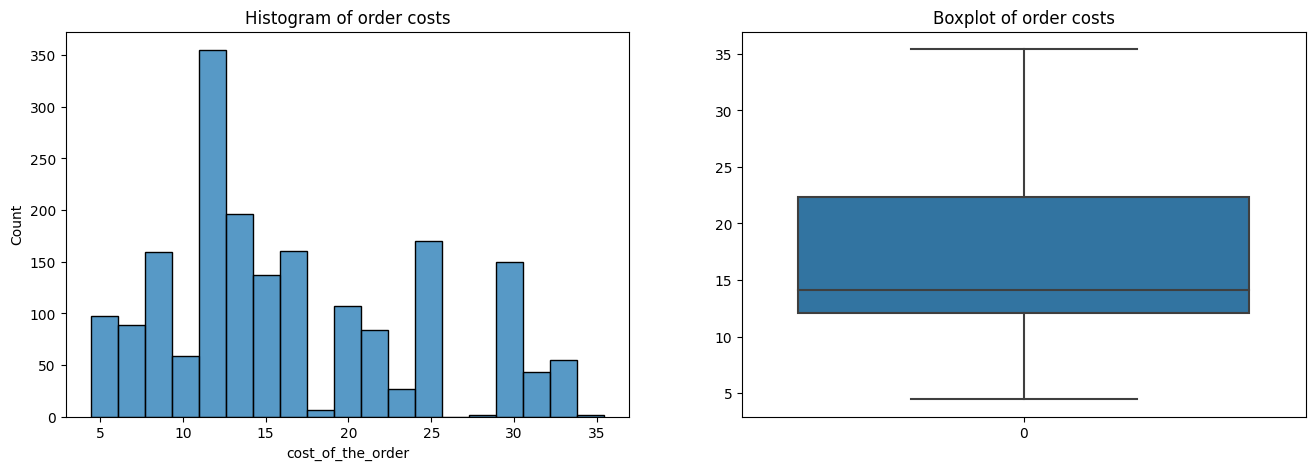

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cost_of_the_order'])
plt.title('Histogram of order costs')
plt.subplot(1,2,2)
sns.boxplot(df['cost_of_the_order'])
plt.title('Boxplot of order costs')
plt.show()

#### Most foods cost between 10 to 15 dollars. Although the currency type was not stated in the data dictionary, we are assuming it is 'dollars' because FoodHub is a home product in the New York. There are no outliers (unusual food prices)

#### Day of the week

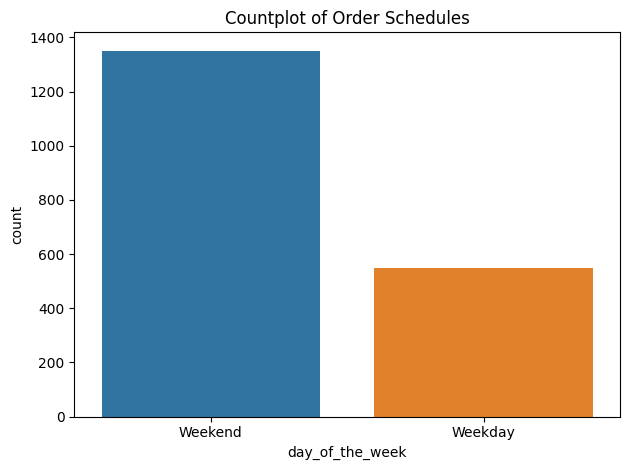

In [13]:
sorted_day_of_week = df['day_of_the_week'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, x='day_of_the_week', order=sorted_day_of_week)
plt.title('Countplot of Order Schedules')
plt.tight_layout()
plt.show()

#### Most food orders are placed during weekends. 

#### Rating

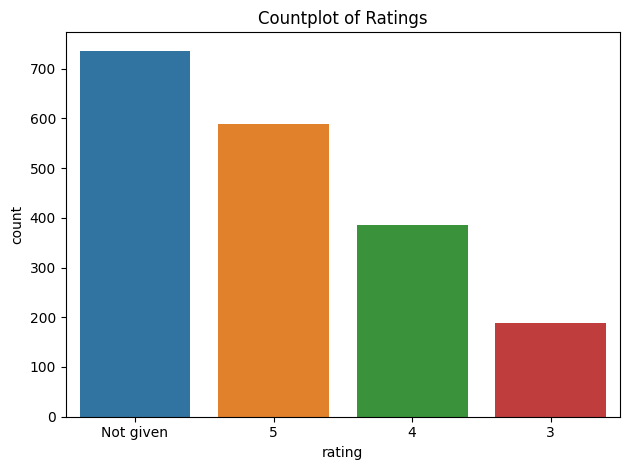

In [14]:
sorted_rating = df['rating'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, x='rating', order=sorted_rating)
plt.title('Countplot of Ratings')
plt.tight_layout()
plt.show()

#### Most food orders don't have ratings. However, for foods that have ratings. rating of 5 tops the chart

#### Food Preparation time

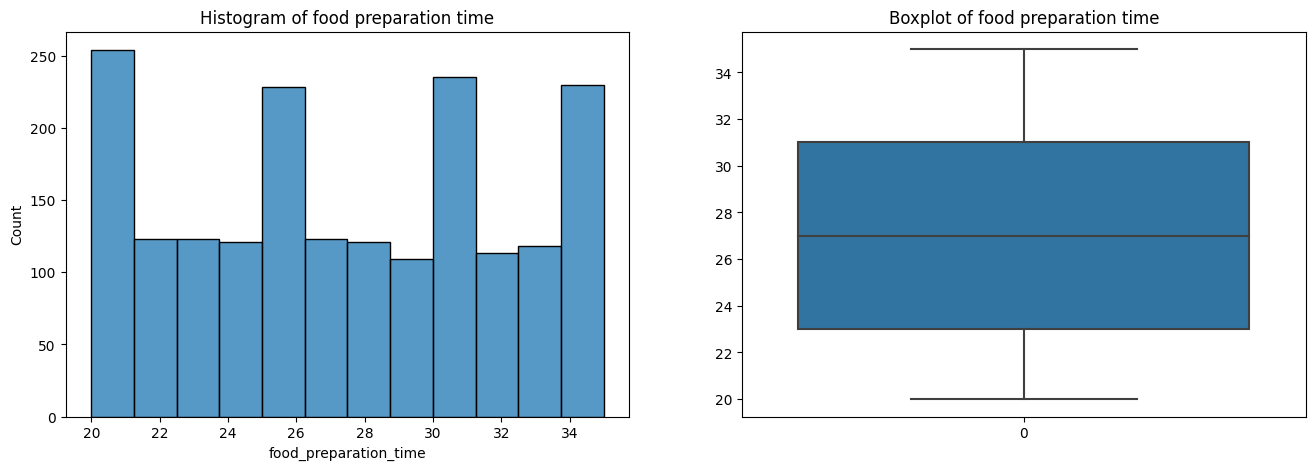

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['food_preparation_time'])
plt.title('Histogram of food preparation time')
plt.subplot(1,2,2)
sns.boxplot(df['food_preparation_time'])
plt.title('Boxplot of food preparation time')
plt.show()

#### The distribution of the preparation times are comparable. There are no outliers (unusual food preparation times)

#### Delivery time

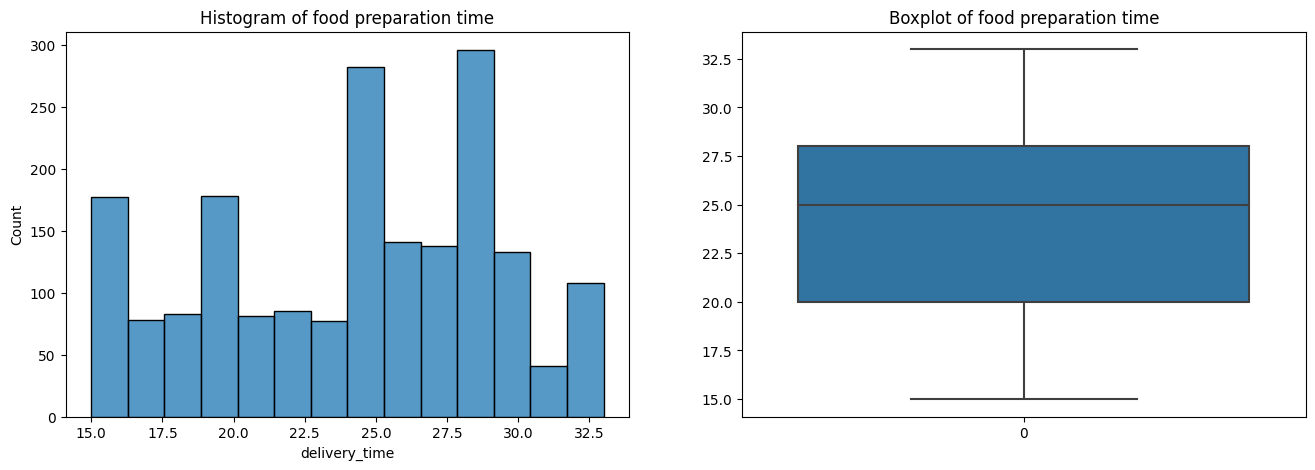

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['delivery_time'])
plt.title('Histogram of food preparation time')
plt.subplot(1,2,2)
sns.boxplot(df['delivery_time'])
plt.title('Boxplot of food preparation time')
plt.show()

#### The distribution of the delivery times are comparable. There are no outliers (unusual delivery times)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

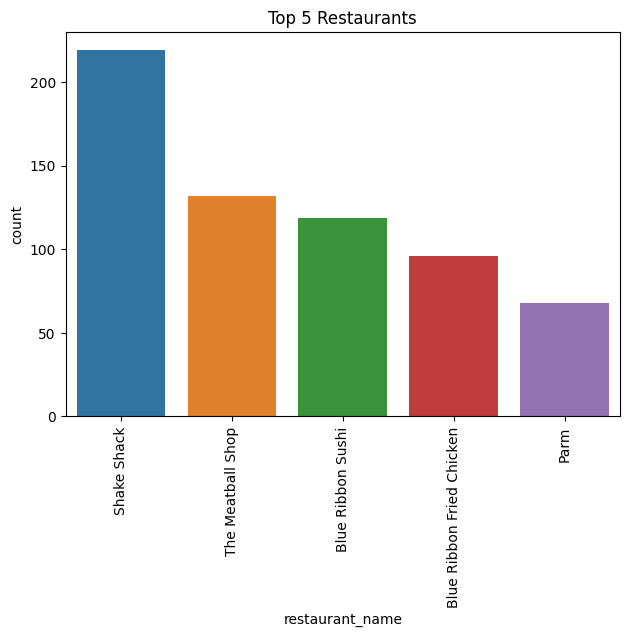

In [17]:
sorted_restaurants = df['restaurant_name'].value_counts().sort_values(ascending=False).index[:5]

sns.countplot(data=df, x='restaurant_name', order=sorted_restaurants)
plt.title('Top 5 Restaurants')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

#### the top 5 restaurants with highest number of orders ar Shake Shack, Meatball Shop, Blue Ribbon Sushi. Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends?

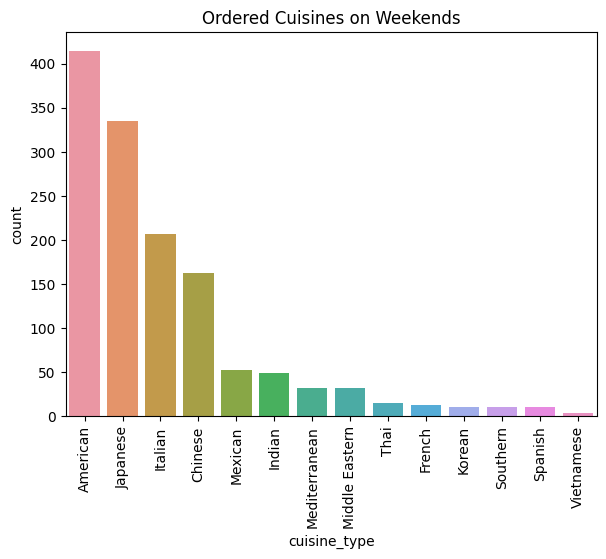

In [18]:
# Filter the Dataset for weekend data
weekend_df = df[df['day_of_the_week'] == 'Weekend']

# Calculate the count of each cuisine type
sorted_cuisine = weekend_df['cuisine_type'].value_counts().sort_values(ascending=False).index

# Create the countplot of cuisine types
sns.countplot(data=weekend_df, x='cuisine_type', order=sorted_cuisine)
plt.title('Ordered Cuisines on Weekends')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

#### According to our chart, the most popular cuisine on Weekend is the American Cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

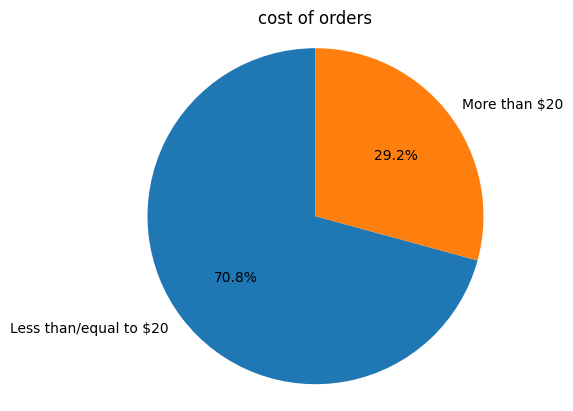

In [19]:
# Count the number of occurrences for each cost of order category
price_counts = df['cost_of_the_order'].apply(lambda x: 'Less than/equal to $20' if x <= 20 else 'More than $20').value_counts()

# Create the pie chart
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('cost of orders')

# Display the chart
plt.axis('equal')
plt.show()

#### 29.2% of the orders cost more than $20

### **Question 10**: What is the mean order delivery time?

In [20]:
df['delivery_time'].mean()

24.161749209694417

#### The mean delivery time is approximately 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [21]:
# Get top 3 count of the distinct values in the customer id column
customer_id_counts = df['customer_id'].value_counts().head(3)

print(customer_id_counts)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### The IDs of the most frequent customers are 52832 with 13 orders, 47440 with 10 orders and 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

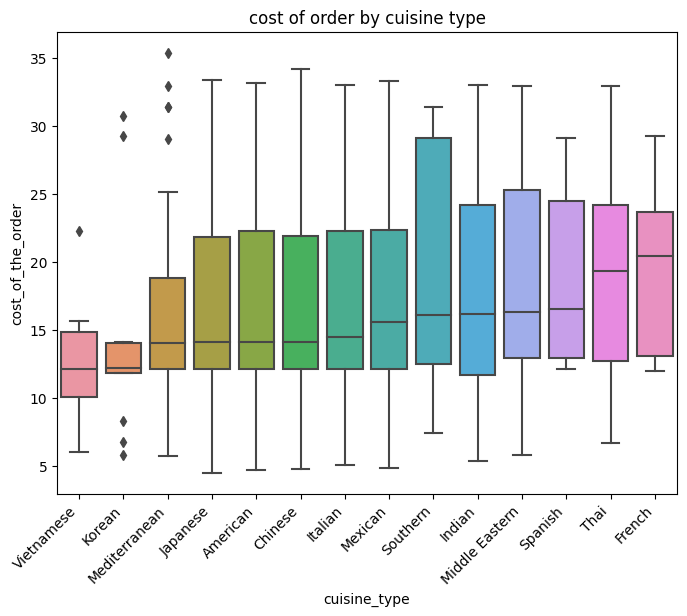

In [24]:
# Calculate the median values for each cuisine_type category
median_values = df.groupby('cuisine_type')['cost_of_the_order'].median().reset_index()

# Sort the median_values DataFrame in ascending order based on the median values
sorted_median_values = median_values.sort_values('cost_of_the_order')

# Create boxplot using the sorted cuisine_type categories
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cuisine_type'], y=df['cost_of_the_order'], order=sorted_median_values['cuisine_type'])

# Set labels and title
plt.xlabel('cuisine_type')
plt.ylabel('cost_of_the_order')
plt.title('cost of order by cuisine type')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### The median lines in the boxplots greatly overlap between categories. Hence, the cost of order don't vary by cuisine type and doesn't have a relationship

In [23]:
# The usual correlation coefficient won't be used to confirm what was interpreted in our visualization 
# because we are trying to find relationship between a multi-class categorical variable and numerical variable. 
# Instead ANOVA will be used. 

# Create separate groups for each cuisine category
groups = [df['cost_of_the_order'][df['cuisine_type'] == cuisine] for cuisine in df['cuisine_type'].unique()]

# Perform ANOVA test
anova_result = stats.f_oneway(*groups)
print("ANOVA p-value:", anova_result.pvalue.round(3))

ANOVA p-value: 0.103


#### The ANOVA p-value is greater than 0.01 significance level. Hence, there's not enough evidence to suggest that there's a relationship between cuisine and cost of the order however our bar plot helps to see that Thai,Southern,French and Spanish are more costly than other cuisines.

#### Cuisine vs Food Preparation time

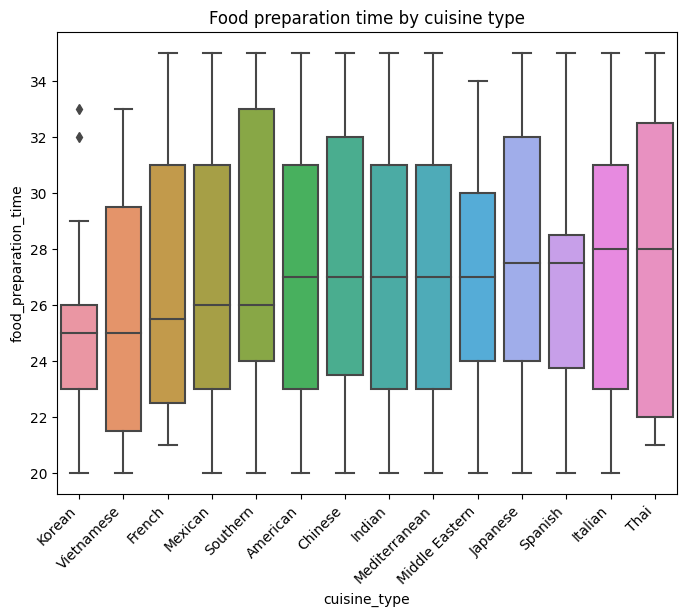

In [25]:
# Calculate the median values for each cuisine_type category
median_values = df.groupby('cuisine_type')['food_preparation_time'].median().reset_index()

# Sort the median_values DataFrame in ascending order based on the median values
sorted_median_values = median_values.sort_values('food_preparation_time')

# Create boxplot using the sorted cuisine_type categories
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cuisine_type'], y=df['food_preparation_time'], order=sorted_median_values['cuisine_type'])

# Set labels and title
plt.xlabel('cuisine_type')
plt.ylabel('food_preparation_time')
plt.title('Food preparation time by cuisine type')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### The median lines in the boxplots also greatly overlap between cuisine types. Hence, the food preparation time don't vary by cuisine type and doesn't have a relationship

In [25]:
# Use ANOVA to confirm the interpretation of our visualization
# Create separate groups for each cuisine category
groups = [df['food_preparation_time'][df['cuisine_type'] == cuisine] for cuisine in df['cuisine_type'].unique()]

# Perform ANOVA test
anova_result = stats.f_oneway(*groups)
print("ANOVA p-value:", anova_result.pvalue.round(3))

ANOVA p-value: 0.875


#### The ANOVA p-value is greater than 0.01 significance level. Hence, there's not enough evidence to suggest that there's a relationship between cuisine and food preparation time however, the barplot shows that Southern cuisines slightly takes more preparation time than others.

#### Day of the Week vs Delivery time

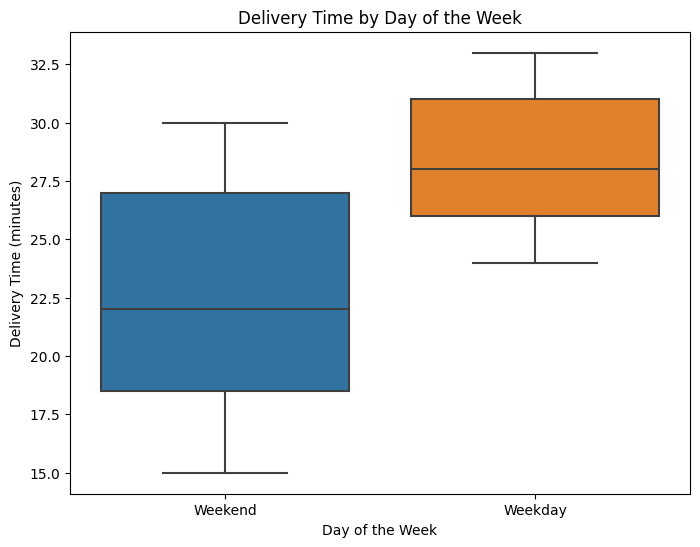

In [26]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['day_of_the_week'], y= df['delivery_time'])

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.title('Delivery Time by Day of the Week')

# Show the plot
plt.show()

#### There's no overlap between the weekend and weekday categories here. This means that a relationship exists that as days progresses to weekdays, the delivery time increases

In [27]:
# Because the day_of_the_week categorical variable is biclass, we'll use Point-biserial correlation to confirm the 
# interpretation of our visualization
point_biserial_corr, _ = stats.pointbiserialr(df['day_of_the_week'].astype('category').cat.codes, df['delivery_time'])
print("Point-biserial correlation coefficient:", point_biserial_corr.round(3))

Point-biserial correlation coefficient: -0.535


#### The correlation value shows that there's a weak inverse relationship between day of the week and delivery times. That is, as the days go from weekdays to weekends, the delivery time decreases. This can be attributed to lesser traffic during weekends but requires further analysis to conclude.

#### Day of the Week vs Food Preparation time

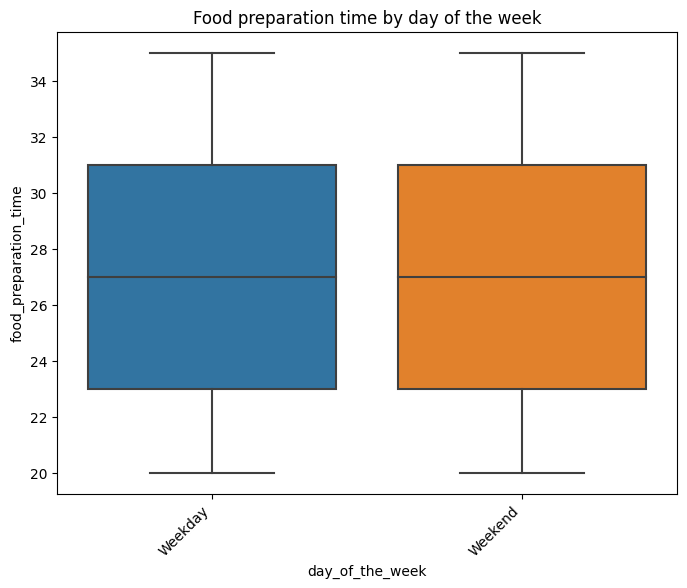

In [26]:
# Calculate the median values for each cuisine_type category
median_values = df.groupby('day_of_the_week')['food_preparation_time'].median().reset_index()

# Sort the median_values DataFrame in ascending order based on the median values
sorted_median_values = median_values.sort_values('food_preparation_time')

# Create boxplot using the sorted cuisine_type categories
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['day_of_the_week'], y=df['food_preparation_time'], order=sorted_median_values['day_of_the_week'])

# Set labels and title
plt.xlabel('day_of_the_week')
plt.ylabel('food_preparation_time')
plt.title('Food preparation time by day of the week')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### There's also a huge overlap between the boxplots of weekday and weekends so there's no relationship between day of the week and food preparation time

In [29]:
# Because the day_of_the_week categorical variable is biclass, we'll use Point-biserial correlation
point_biserial_corr, _ = stats.pointbiserialr(df['day_of_the_week'].astype('category').cat.codes, df['food_preparation_time'])
print("Point-biserial correlation coefficient:", point_biserial_corr.round(3))

Point-biserial correlation coefficient: 0.022


#### Our correlation figures confirms that there is no relationship between day of the week and food preparation time.

#### Rating vs Delivery time

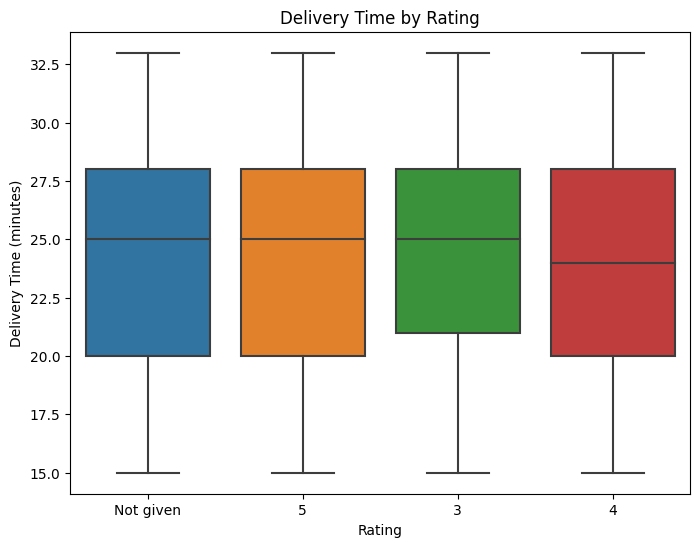

In [30]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['rating'], y= df['delivery_time'])

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.title('Delivery Time by Rating')

# Show the plot
plt.show()

#### There's also a huge overlap between the boxplots of most Rating categories so there's no relationship between rating and delivery time

In [31]:
# The usual correlation coefficient won't be used to confirm what was interpreted in our visualization 
# because we are trying to find relationship between a multi-class categorical variable and numerical variable. 
# Instead ANOVA will be used. 

# Create separate groups for each rating category
groups = [df['delivery_time'][df['rating'] == cuisine] for cuisine in df['rating'].unique()]

# Perform ANOVA test
anova_result = stats.f_oneway(*groups)
print("ANOVA p-value:", anova_result.pvalue.round(3))

ANOVA p-value: 0.456


#### The ANOVA p-value is greater than 0.01 significance level. Hence, there's not enough evidence to suggest that the rating categories vary with delivery time

#### Rating vs Cost of the order

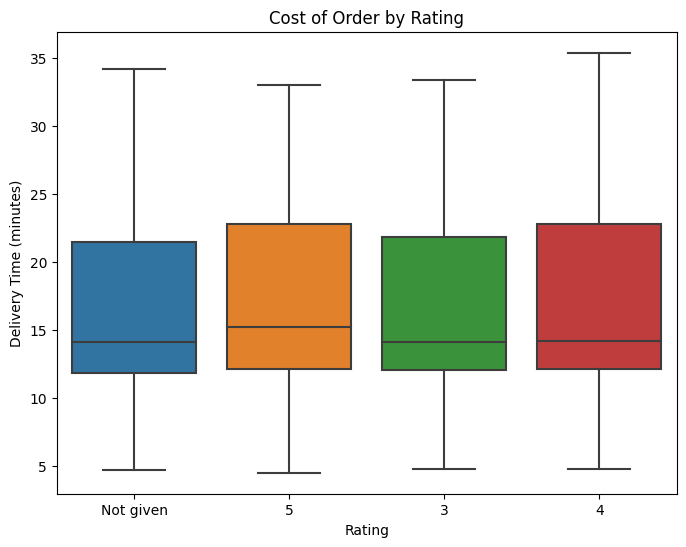

In [28]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['rating'], y= df['cost_of_the_order'])

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.title('Cost of Order by Rating')

# Show the plot
plt.show()

#### Most rating categories overlap. Hence, the cost of order don't vary based on the rating 

In [33]:
# confirm the visualization interpretation using ANOVA due to the multiclass categorical variable
# Create separate groups for each rating category
groups = [df['cost_of_the_order'][df['rating'] == cuisine] for cuisine in df['rating'].unique()]

# Perform ANOVA test
anova_result = stats.f_oneway(*groups)
print("ANOVA p-value:", anova_result.pvalue.round(3))

ANOVA p-value: 0.165


#### The ANOVA p-value is greater than 0.01 significance level. Hence, there's not enough evidence to suggest that there's differences between rating based on the cost of order

#### Correlation among variables

#### To illustrate correlation among variables, we'll be doing this in three ways:
#### - Find correlation between numerical variables only
#### - Find correlation between categorical variables only
#### - Find correlation between categorical and numerical variables

In [34]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['float', 'int'])

# Calculate correlation matrix (using Pearson correlation)
correlation_matrix = numerical_df.corr()

# Create a structured correlation table
correlation_table = correlation_matrix.style.format(precision=3).background_gradient(cmap='coolwarm')

# Display the correlation table
display(correlation_table)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000,-0.014,0.021,-0.007,0.010
customer_id,-0.014,1.000,-0.001,-0.030,-0.010
cost_of_the_order,0.021,-0.001,1.000,0.042,-0.030
food_preparation_time,-0.007,-0.030,0.042,1.000,0.011
delivery_time,0.010,-0.010,-0.030,0.011,1.000


#### None of the numerical variables have strong relationship with each other.

In [35]:
# Select only the categorical columns
categorical_df = df.select_dtypes(include=['object', 'category'])

# Calculate the Cramer's V matrix
n = len(df)
cramer_v_matrix = pd.DataFrame(index=categorical_df.columns, columns=categorical_df.columns)
for i in categorical_df.columns:
    for j in categorical_df.columns:
        confusion_matrix = pd.crosstab(categorical_df[i], categorical_df[j])
        chi2, _, _, _ = chi2_contingency(confusion_matrix)
        cramer_v_matrix.loc[i, j] = np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Create a structured table for Cramer's V matrix
cramer_v_table = cramer_v_matrix.style.format(precision=3).background_gradient(cmap='coolwarm')

# Display the Cramer's V table
display(cramer_v_table)

,restaurant_name,cuisine_type,day_of_the_week,rating
restaurant_name,1.000,0.997,0.303,0.297
cuisine_type,0.997,1.000,0.071,0.084
day_of_the_week,0.303,0.071,0.999,0.035
rating,0.297,0.084,0.035,1.000


#### There is strong correlation between cuisine_type and restaurant_name (0.997). This could be because restaurants specialize in a particular cuisine type

In [36]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

# Iterate over the combinations of categorical and numerical variables to select each of them
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        group_labels = df[cat_col].unique()
        groups = [df[num_col][df[cat_col] == label] for label in group_labels]
        anova_result = stats.f_oneway(*groups)
        print(f"ANOVA p-value between {cat_col} and {num_col}: {anova_result.pvalue.round(3)}")
        print("")

ANOVA p-value between restaurant_name and order_id: 0.717

ANOVA p-value between restaurant_name and customer_id: 0.0

ANOVA p-value between restaurant_name and cost_of_the_order: 0.045

ANOVA p-value between restaurant_name and food_preparation_time: 0.304

ANOVA p-value between restaurant_name and delivery_time: 0.526

ANOVA p-value between cuisine_type and order_id: 0.954

ANOVA p-value between cuisine_type and customer_id: 0.001

ANOVA p-value between cuisine_type and cost_of_the_order: 0.103

ANOVA p-value between cuisine_type and food_preparation_time: 0.875

ANOVA p-value between cuisine_type and delivery_time: 0.497

ANOVA p-value between day_of_the_week and order_id: 0.543

ANOVA p-value between day_of_the_week and customer_id: 0.653

ANOVA p-value between day_of_the_week and cost_of_the_order: 0.487

ANOVA p-value between day_of_the_week and food_preparation_time: 0.339

ANOVA p-value between day_of_the_week and delivery_time: 0.0

ANOVA p-value between rating and order_id: 0

#### The variables that have ANOVA p-values less than 0.01 have relationships between each other because the categories vary based on the numerical variable. However, ANOVA doesn't tell us how strong these variations are. These variables include: restaurant_name and customer_id, cuisine_type and customer_id, day_of_the_week and delivery_time, and rating and order_id. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [37]:
df = df[df['rating'] != 'Not given']
df['rating'] = df['rating'].astype(int)

#df1 = df.groupby('restaurant_name')['rating'].median().round()
#print(df1)
# Group restaurants by 'restaurant_name' and calculate count and mean
grouped_restaurants = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']})

# Flatten the column names
grouped_restaurants.columns = ['Count', 'Mean']

# apply the conditions
eligible_restaurants = grouped_restaurants[(grouped_restaurants['Count'] > 50) & (grouped_restaurants['Mean'] > 4)]

# Reset the index
eligible_restaurants = eligible_restaurants.reset_index()

# Display the grouped restaurants
print(eligible_restaurants)

             restaurant_name  Count      Mean
0  Blue Ribbon Fried Chicken     64  4.328125
1          Blue Ribbon Sushi     73  4.219178
2                Shake Shack    133  4.278195
3          The Meatball Shop     84  4.511905


#### The restaurants that are eligible for this discount are Shake Shack, Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [38]:
# Define a function to calculate commission based on price
def calculate_commission(price):
    if price > 20:
        return price * 0.25
    elif price > 5:
        return price * 0.15
    else:
        return 0

# Create the new column 'commission' using the 'price' column
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)
sum(df['commission'])

3865.572000000005

#### The revenue generated across all orders is approximately 3866 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

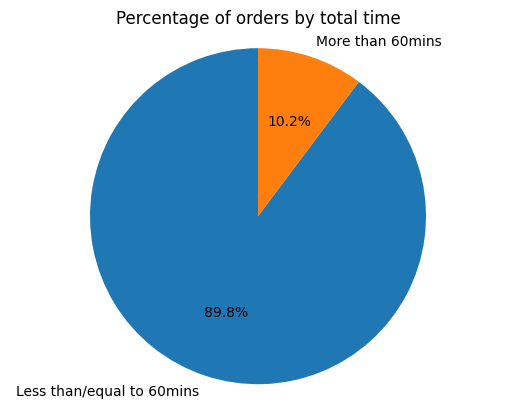

In [39]:
df['total time'] = df['food_preparation_time'] + df['delivery_time']

#use pie chart to illustrate the percentage
price_counts = df['total time'].apply(lambda x: 'Less than/equal to 60mins' if x <= 60 else 'More than 60mins').value_counts()

# Create the pie chart
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of orders by total time')

# Display the chart
plt.axis('equal')
plt.show()

#### The percentage of orders more than 60 minutes is 10.2%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [40]:
df1 = df.groupby('day_of_the_week')['delivery_time'].mean().round()
print(df1)

day_of_the_week
Weekday    28.0
Weekend    22.0
Name: delivery_time, dtype: float64


#### The mean delivery time is shorter in weekends (22mins) than weekdays(28mins). 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

## Conclusion

- Many customers prefer specific restaurants than the other
- This restaurant preference could be based on the nature of the cuisine since restaurants are specialized in specific cuisine types
- Orders are higher during weekends than weekdays
- Shake Shack, Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken are consistent in terms of top restaurants with most orders and top ratings. 
- American, Japanese, Italian and Chinese cuisine types are the most ordered
- Most customers don't give ratings to the foods they order

## Recommendations
#### The below recommendations are made for the purpose of increasing revenue for the company
- Enhance Restaurant Selection: Based on the finding that many customers prefer specific restaurants over others, ensure that the app offers a wide selection of popular and highly rated restaurants. 

- Optimize Delivery Experience: Since orders are higher during weekends, optimize the delivery operations to handle the increased demand effectively. Ensure that there are sufficient delivery partners and resources available to maintain timely deliveries. Consider offering delivery promotions or incentives during weekends to encourage more orders and retain customer loyalty.

- Strengthen Partnerships with Top Restaurants: Collaborate closely with the consistently popular and highly rated restaurants mentioned in the findings, such as Shake Shack, Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken. Build strong partnerships with these restaurants to ensure a seamless ordering and delivery experience for customers. Work closely with them to streamline order processing, optimize packaging, and maintain food quality during delivery.

- Loyalty Programs and Special Offers: Implement a loyalty program to incentivize repeat orders and customer retention. Offer exclusive discounts, rewards, or freebies to customers who frequently order through the app. Collaborate with partner restaurants to create special offers or promotions that are exclusive to the platform, providing additional value to customers.

- In-App Reminders: Send gentle reminders to customers after they have received their food delivery, encouraging them to provide feedback and rate their experience. These reminders can be in the form of push notifications or emails, prompting customers to share their thoughts and ratings.

- Engaging and Interactive Feedback Forms: Make the rating process more engaging by using interactive feedback forms. Include elements such as emojis, sliders, or comment boxes that allow customers to express their opinions and experiences in a more interactive manner. This can increase the likelihood of customers leaving ratings.